In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random
import math

## Helper Functions

In [14]:
# Plot multiple images
def plot_images(images, titles, main_title):
    
    # Determine dimensions for subplot array
    x = math.ceil(len(images)/2)
    y = 4
    
    # Iterate through each image
    for i in range(len(images)):
        fig = plt.subplot(x, y, i + 1)
        
        # Remove axes
        plt.axis("off")
        
        # Plot formatting
        plt.subplots_adjust(wspace=0.25, hspace=0.9, top=0.9)
        plt.title(titles[i])
        fig = plt.gcf()
        fig.set_size_inches(10,10)
        plt.imshow(images[i], cmap="grey")
        
    plt.suptitle(main_title, fontsize=16)

In [3]:
images = list()
titles = list()

## Project 1: Color Models

Write a program that converts the Lena_color image to Gray, and HLS color
spaces and vice versa. `cv2.cvtColor` function coverts an image from one color space to another. In OpenCV, RGB values are normally stored in BGR format.

In [4]:
# Read image and store it
lena = cv2.imread("../data/lab06/lena_color_256.tif")
# Convert BGR to RGB
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
images.append(lena_rgb)
titles.append("Original Image")

In [5]:
# GRAYSCALE
lena_g = cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2GRAY) # Convert image to grayscale
images.append(lena_g)
titles.append("Grayscale Lena Image")

In [6]:
# HLS (HSI)
lena_hls = cv2.cvtColor(lena_rgb, cv2.COLOR_BGR2HLS) # Convert image to HLS
titles.append("HLS Lena Image")
images.append(lena_hls)

In [7]:
# HLS2BGR
lena_hls2bgr = cv2.cvtColor(lena_hls, cv2.COLOR_HLS2BGR) # Convert image to HLS
titles.append("HLS2BGR Lena Image")
images.append(lena_hls2bgr)

In [8]:
# GRAY2BGR
lena_gray2bgr = cv2.cvtColor(lena_g, cv2.COLOR_GRAY2BGR)
titles.append("GRAY2BGR Lena Image")
images.append(lena_gray2bgr)

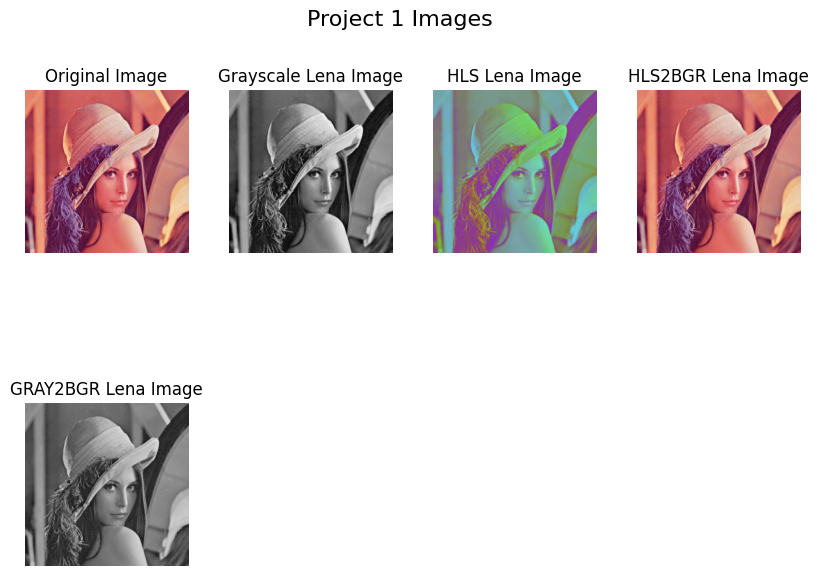

In [15]:
plot_images(images, titles, "Project 1 Images")

## Project 2: Skin Detection

Write a program that performs Skin Detection on skin image. Convert the image
into HLS color space, before applying conditions. You can use `cv2.split` function to extract various components from the color image and `cv2.merge` to merge various components to generate a composite image. Display the original image and the skin-detected images using `matplotlib.pyplot` library’s `subplot` and `imshow` functions. 

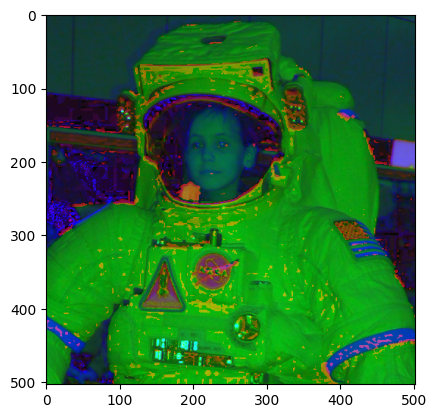

In [16]:
# Read image
skin = cv2.imread("../data/lab06/skin.jpg")
# Convert BGR to RGB
skin_rgb = cv2.cvtColor(skin, cv2.COLOR_BGR2RGB)
# Convert to HSL so we can access values directly
skin_hsl = cv2.cvtColor(skin_rgb, cv2.COLOR_RGB2HLS)
# Save hue, luminance, and saturation matrices
hue, lumi, sat = cv2.split(skin_hsl)
# Show image before change
plt.imshow(skin_hsl)

In [19]:
def skin_detection(hue, lumi, sat):
    # Save lumi/sat as array to check later
    lumi_sat = lumi/sat
    
    # Create mask using criteria
    mask = ((hue>=14) | (hue<=165)) & (sat<=0.2) & (lumi_sat<0.5) & (lumi_sat>3.0)
    
    # Apply mask to each layer (hue, saturation, luminance)
    hue[mask] = 0
    sat[mask] = 0
    lumi[mask] = 0
    
    # Merge layers back together
    merged = cv2.merge((hue, sat, lumi))
    
    # Return merged image
    return merged

C:\Users\britk\AppData\Local\Temp/ipykernel_24100/3787358371.py:3: RuntimeWarning: divide by zero encountered in divide
  lumi_sat = lumi/sat
C:\Users\britk\AppData\Local\Temp/ipykernel_24100/3787358371.py:3: RuntimeWarning: invalid value encountered in divide
  lumi_sat = lumi/sat


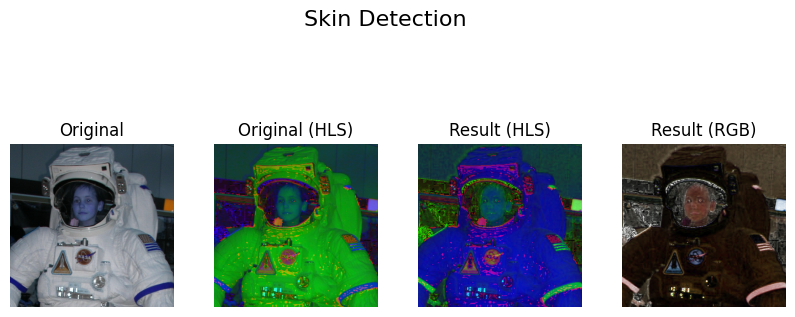

In [20]:
# Perform skin detection
skin_result = skin_detection(hue, lumi, sat)
# Convert result to RGB
result_rgb = cv2.cvtColor(result, cv2.COLOR_HLS2RGB)
# Display results
skin_images = [skin, skin_hsl, result, result_rgb]
titles = ["Original", "Original (HLS)", "Result (HLS)", "Result (RGB)"]

plot_images(skin_images, titles, "Skin Detection")

# Project 3: Red Eye Detection

In [23]:
def red_eye_detection(hue, lumi, sat):
    # Save lumi/sat as array to check later
    lumi_sat = lumi/sat
    
    # Create mask using criteria
    mask = (lumi<=64) & (sat<=100) & (lumi_sat<0.5) & (lumi_sat>1.5) & ((hue<=7) | (hue>=162))
    
    # Apply mask to each layer (hue, saturation, luminance)
    hue[mask] = 0
    sat[mask] = 0
    lumi[mask] = 0
    
    # Merge layers back together
    merged = cv2.merge((hue, sat, lumi))
    
    # Return merged image
    return merged

In [26]:
# reset layers
hue, lumi, sat = cv2.split(skin_hsl)

C:\Users\britk\AppData\Local\Temp/ipykernel_24100/3171515106.py:3: RuntimeWarning: divide by zero encountered in divide
  lumi_sat = lumi/sat
C:\Users\britk\AppData\Local\Temp/ipykernel_24100/3171515106.py:3: RuntimeWarning: invalid value encountered in divide
  lumi_sat = lumi/sat


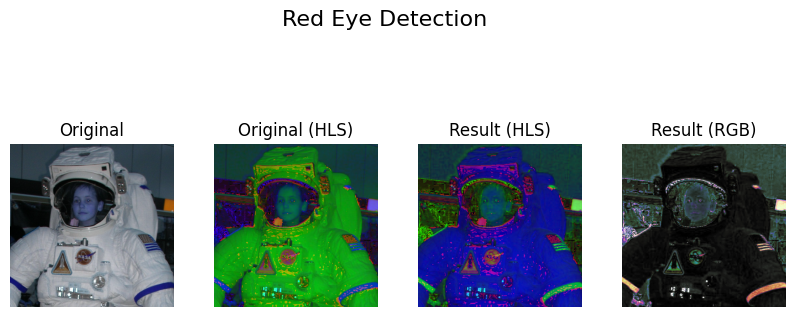

In [28]:
red_result = red_eye_detection(hue, lumi, sat)
# Convert result to RGB
red_result_rgb = cv2.cvtColor(red_result_rgb, cv2.COLOR_HLS2RGB)
# Display results
red_images = [skin, skin_hsl, red_result, red_result_rgb]
titles = ["Original", "Original (HLS)", "Result (HLS)", "Result (RGB)"]

plot_images(red_images, titles, "Red Eye Detection")